In [198]:
import warnings
warnings.filterwarnings('ignore')

In [199]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats

from sklearn import metrics

In [200]:
df = pd.read_csv('./Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [201]:
df.shape

(5000, 14)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [203]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


----------
**Insights:** 
- Minimum Experience has negative values. We will need to fix these values

In [204]:
df.nunique() # Number of unique values in column

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [205]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [206]:
# number of people with 0 Mortgage
df[df['Mortgage']==0]['Mortgage'].count()

3462

In [207]:
# number of people with 0 Credit Card Spend
df[df['CCAvg']==0]['CCAvg'].count()

106

In [208]:
df['ZIP Code'].value_counts(normalize=True)

94720    0.0338
94305    0.0254
95616    0.0232
90095    0.0142
93106    0.0114
          ...  
96145    0.0002
94970    0.0002
94598    0.0002
90068    0.0002
94087    0.0002
Name: ZIP Code, Length: 467, dtype: float64

In [209]:
df['Family'].value_counts(normalize=True)

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64

In [210]:
df['Education'].value_counts(normalize=True)

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

In [211]:
df['Securities Account'].value_counts(normalize=True)

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

In [212]:
df['CD Account'].value_counts(normalize=True)

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

In [213]:
df['Online'].value_counts(normalize=True)

1    0.5968
0    0.4032
Name: Online, dtype: float64

In [214]:
df['CreditCard'].value_counts(normalize=True)

0    0.706
1    0.294
Name: CreditCard, dtype: float64

In [215]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = df['Personal Loan'].value_counts(normalize=True)
print(prop_Y)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


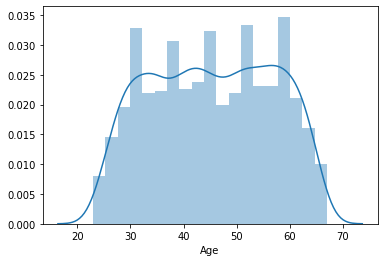

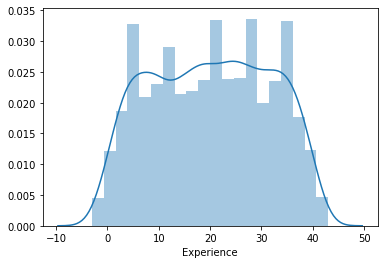

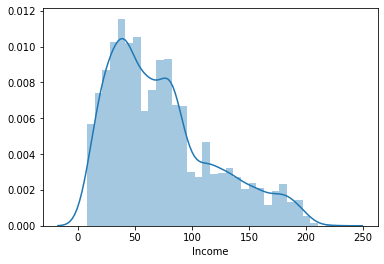

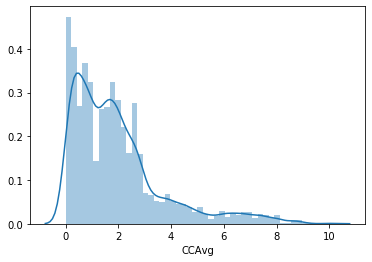

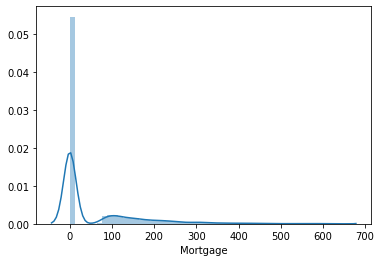

In [216]:
# distplot for continous columns
for i in ['Age','Experience','Income','CCAvg','Mortgage']:
    sns.distplot(df[i])
    plt.show()

--------------
**Insights**
- There is some skewness in Income, CCAvg and Mortgage, but that is ok as banks will have skewed customers

In [217]:
# Let us look at the target column which is 'Loan_Status' to understand how the data is distributed amongst the various values
df.groupby(["Personal Loan"]).mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [218]:
df.groupby(["Personal Loan"]).median()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2518.5,45.0,20.0,59.0,93437.0,2.0,1.4,2.0,0.0,0.0,0.0,1.0,0.0
1,2342.0,45.0,20.0,142.5,93407.0,3.0,3.8,2.0,0.0,0.0,0.0,1.0,0.0


In [219]:
pd.crosstab(df['ZIP Code'],df['Personal Loan'],normalize='index')

Personal Loan,0,1
ZIP Code,,
9307,1.0,0.0
90005,1.0,0.0
90007,1.0,0.0
90009,1.0,0.0
90011,1.0,0.0
...,...,...
96091,1.0,0.0
96094,1.0,0.0
96145,1.0,0.0


In [220]:
pd.crosstab(df['Family'],df['Personal Loan'],normalize='index')

Personal Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890344,0.109656


In [221]:
pd.crosstab(df['Securities Account'],df['Personal Loan'],normalize='index')

Personal Loan,0,1
Securities Account,,
0,0.906208,0.093792
1,0.885057,0.114943


In [222]:
pd.crosstab(df['CD Account'],df['Personal Loan'],normalize='index')

Personal Loan,0,1
CD Account,,
0,0.927629,0.072371
1,0.536424,0.463576


In [223]:
pd.crosstab(df['Online'],df['Personal Loan'],normalize='index')

Personal Loan,0,1
Online,,
0,0.90625,0.09375
1,0.90248,0.09752


In [224]:
pd.crosstab(df['CreditCard'],df['Personal Loan'],normalize='index')

Personal Loan,0,1
CreditCard,,
0,0.904533,0.095467
1,0.902721,0.097279


In [225]:
pd.crosstab(df['Education'],df['Personal Loan'],normalize='index')

Personal Loan,0,1
Education,,
1,0.955630,0.044370
2,0.870278,0.129722
3,0.863424,0.136576


In [226]:
# check correlation

df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [227]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(rotation=90)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)

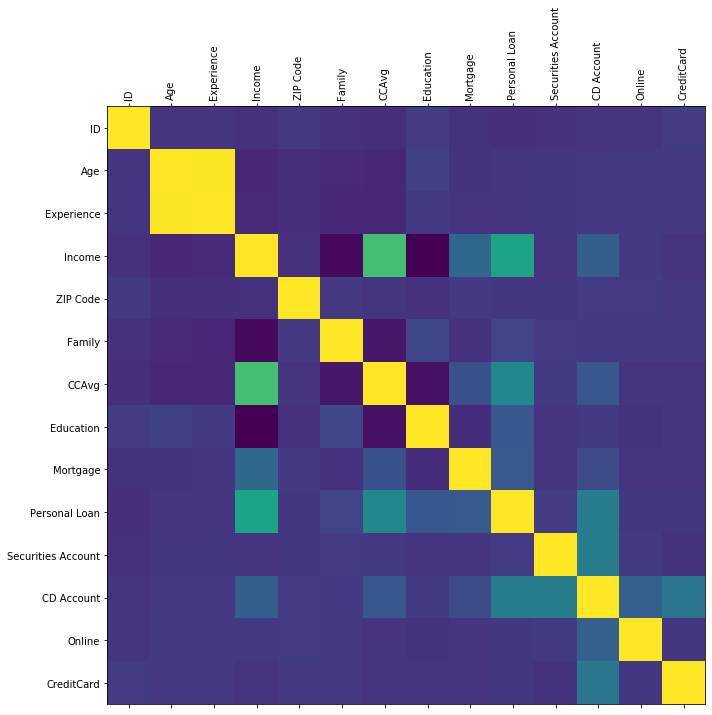

In [228]:
plot_corr(df)
#yellow represents the max correlation and blue the minimum correlation

--------------
**Insights**:

Based on the crosstab and correlation analysis we can can make the following inferences:


- The following columns have minimal or no relationship with Personal Loan. Therefore we can drop them:
    - Age
    - Experience
    - ZIP Code
    - Securities Account
    - Online
    - CreditCard
- The following columns have a relationship with Personal Loan:
    - Income - as Income increases Personal Loans increase
    - Family - there is a slight correlation here as family size increases so does Personal Loans 
    - CCAvg - as CCAvg increases Personal Loans increase
    - Education - as Education increases Personal Loans increase
    - Mortgage - as Mortgage increases Personal Loans increase
    - CD Account - as CD Account increases Personal Loans increase  
        

In [229]:
# Getting the Data Model ready

# we can drop ID as that doesn't have any relation with Personal Loan
df2 = df.drop('ID', axis=1)

In [230]:
# drop the columns we determined earlier
df2 = df2.drop('Age', axis=1)
df2 = df2.drop('Experience', axis=1)
df2 = df2.drop('ZIP Code', axis=1)
df2 = df2.drop('Securities Account', axis=1)
df2 = df2.drop('Online', axis=1)
df2 = df2.drop('CreditCard', axis=1)

In [231]:
df2['Education'] = df2['Education'].replace({1:'undergrad',2:'graduate',3:'advanced/professional'})
df2 = pd.get_dummies(df2, columns=['Education'])
df2.head()

,Income,Family,CCAvg,Mortgage,Personal Loan,CD Account,Education_advanced/professional,Education_graduate,Education_undergrad
0,49,4,1.6,0,0,0,0,0,1
1,34,3,1.5,0,0,0,0,0,1
2,11,1,1.0,0,0,0,0,0,1
3,100,1,2.7,0,0,0,0,1,0
4,45,4,1.0,0,0,0,0,1,0


In [232]:
df2 = df2.drop('Education_undergrad', axis=1)

In [233]:
df2.head()

,Income,Family,CCAvg,Mortgage,Personal Loan,CD Account,Education_advanced/professional,Education_graduate
0,49,4,1.6,0,0,0,0,0
1,34,3,1.5,0,0,0,0,0
2,11,1,1.0,0,0,0,0,0
3,100,1,2.7,0,0,0,0,1
4,45,4,1.0,0,0,0,0,1


In [234]:
X = df2.drop('Personal Loan', axis=1)
Y = df2[['Personal Loan']]

In [235]:
##Split into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

In [236]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=7)
logreg.fit(X_train, y_train)                    # fit the model on train data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [237]:
y_predict = logreg.predict(X_test)    

In [238]:
z = X_test.copy()
z['Observed Personal Loan'] = y_test
z['Predicted Personal Loan'] = y_predict
z.head()

,Income,Family,CCAvg,Mortgage,CD Account,Education_advanced/professional,Education_graduate,Observed Personal Loan,Predicted Personal Loan
3406,34,3,2.0,0,0,1,0,0,0
757,81,3,1.8,0,0,0,1,0,0
3624,70,1,1.4,0,0,1,0,0,0
4544,80,3,2.5,0,0,0,0,0,0
3235,39,2,1.6,0,0,1,0,0,0


In [239]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9554285714285714

Testing accuracy 0.96

Confusion Matrix


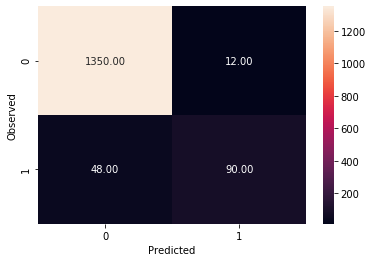

None

Recall: 0.6521739130434783

Precision: 0.8823529411764706

F1 Score: 0.75

Roc Auc Score: 0.8216816701781268


In [240]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

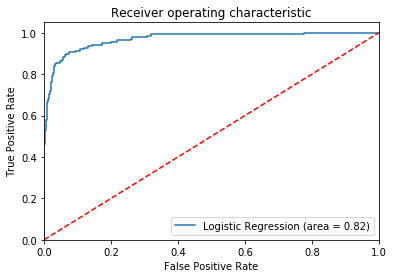

In [241]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Improving Model Performance via Checking Parameters of Logistic Regression

In [242]:
# Checking Parameters of logistic regression
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [243]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.956, 0.956, 0.953, 0.902, 0.902]

[0.959, 0.96, 0.955, 0.908, 0.908]


In [244]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.956, 0.902]

[0.959, 0.908]


------------
**Insights**

- Highest accuracy is 'l2' with 'lbfgs'

In [245]:
model = LogisticRegression(random_state=42,penalty='l2',solver='lbfgs',class_weight='balanced') # changing class weight to balanced

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.8914285714285715

Testing accuracy 0.894


-----------------------
**Insights:**

- Adding class weight to correct the overfitting of model

In [247]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l2', solver='lbfgs',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.884, 0.893, 0.892, 0.891, 0.89, 0.891]

[0.881, 0.897, 0.897, 0.891, 0.893, 0.894]


----------------
**Insights:**

- C=0.5 (default) gives the best accuracy 

Trainig accuracy 0.8911428571428571

Testing accuracy 0.8906666666666667

Confusion Matrix


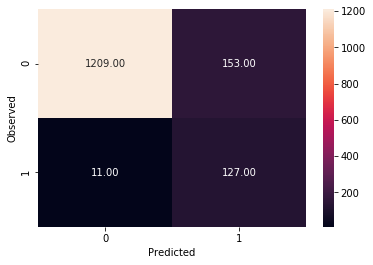

None

Recall: 0.9202898550724637

Precision: 0.45357142857142857

F1 Score: 0.6076555023923444

Roc Auc Score: 0.9039775266551746


In [254]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l2', solver='lbfgs', class_weight='balanced',C=0.5) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

-----------



**Understanding of the Model**

`Confusion matrix:`

*True Positive (observed=1,predicted=1):*

Predicted that customer will but the personal loan and they did

*False Positive (observed=0,predicted=1):*

Predicted that customer would buy the personal loan but they did not

*True Negative (observed=0,predicted=0):*

Predicted that customer would not buy the personal loan and they did not

*False Negative (observed=1,predicted=0):*

Predicted that customer would not buy the personal loan and they did buy it

The marketing department wants to maximize the prediction of number of customers buying personal loans, so they want to minimize the number of False Negatives. Therefore a high **recall** number is important.

